In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Paths to your folders
folder1_path = r'/content/drive/MyDrive/heart_0/Normal'
folder2_path = r'/content/drive/MyDrive/heart_0/Tuberculosis'

In [4]:
def load_img(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
    return images, labels

In [5]:
# Load images and labels from both folders
folder1_images, folder1_labels = load_img(folder1_path, label=0)  # Label 0 for folder1
folder2_images, folder2_labels = load_img(folder2_path, label=1)  # Label 1 for folder2

In [6]:
all_images = np.array(folder1_images + folder2_images)
all_labels = np.array(folder1_labels + folder2_labels)

In [7]:
all_images = all_images / 255.0

In [18]:
x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.3,random_state=42)

In [19]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (2910, 128, 128, 3)
Testing data shape: (1248, 128, 128, 3)
Training labels shape: (2910,)
Testing labels shape: (1248,)


In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(128,128,3)))
#model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
#model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1905152)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     243,859,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,963,201 (930.65 MB)

 Trainable params: 243,963,201 (930.65 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
his = model.fit(x_train,y_train,epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 48s 340ms/step - accuracy: 0.8328 - loss: 1.6880 - val_accuracy: 0.9354 - val_loss: 0.1386
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 129ms/step - accuracy: 0.9389 - loss: 0.1678 - val_accuracy: 0.8108 - val_loss: 0.3749
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.9202 - loss: 0.2039 - val_accuracy: 0.9429 - val_loss: 0.1741
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9614 - loss: 0.1102 - val_accuracy: 0.9610 - val_loss: 0.1046
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9783 - loss: 0.0770 - val_accuracy: 0.9640 - val_loss: 0.1090
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9769 - loss: 0.0601 - val_accuracy: 0.9595 - val_loss: 0.0979
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9905 - loss: 0.0352 - val_accuracy: 0.9550 - val_loss: 0.1536
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9854 - loss: 0.0402 - val_accu

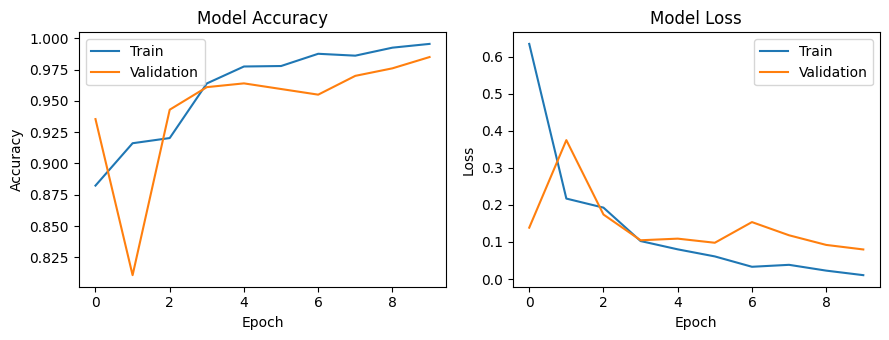

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))

# Plot accuracy
axes[0].plot(his.history['accuracy'])
axes[0].plot(his.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'])

# Plot loss
axes[1].plot(his.history['loss'])
axes[1].plot(his.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [17]:
model.save('cheast_model.h5')